In [83]:
# Analysis:
#   D=1 -- computes diffusion coefficient
#   alpha=[dt1,dt2] - list of time steps dt1 and dt2 to build the profiles.
#   ptpx=1 -- computes the probability of being on the transition path.
#     Arguments --x0= , --x1=  and  --dx= should be specified
#     testoptimality=1 -- tests the optimality of the reaction coordinate.
#     Arguments --x0= and --x1= should be specified (x0<x1)

In [84]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)

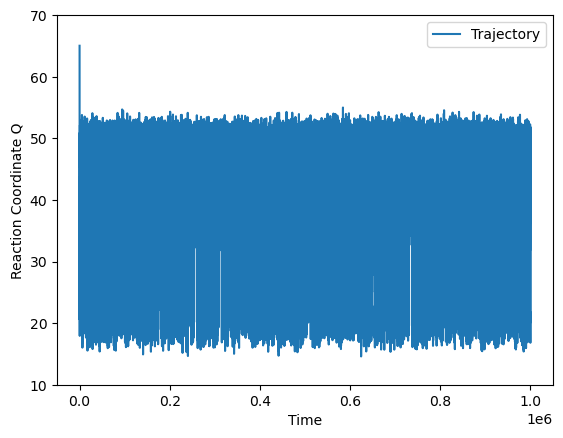

In [85]:
fig, ax = plt.subplots()
ax.plot(x, label = 'Trajectory') 
plt.xlabel('Time')
plt.ylabel('Reaction Coordinate Q')
plt.ylim([10, 70])
plt.legend()
plt.show()

In [89]:
# calculo da probabilidade condicional

def compZh(x,dx,dt=1):
    zh={}
    for x in x:
        x=math.floor(x/dx)*dx
        zh[x]=zh.get(x,0)+1
    for x in zh:zh[x]=float(zh[x])/dt/dx
    return zh

TP = compZh(x,dx=0.1,dt=1)

Tp = np.asarray(TP)

# np.savetxt("pTP", TP, fmt="%5.2f")

# print(Tp)

A função compZh calcula uma distribuição de probabilidade condicional. Ela recebe uma lista x, um valor dx e um valor de tempo dt (com um valor padrão de 1). Essa função itera sobre os valores em x, arredonda cada valor para o menor múltiplo de dx e então contabiliza a frequência desses valores em um dicionário zh. Posteriormente, divide esses valores pela quantidade total de tempo e pelo tamanho do intervalo dx para obter a distribuição de probabilidade.

In [81]:
def compptpx(lx,dx,x0,x1):
    zheq=compZh(lx,dx)
    zhtp={}
    def addZh(zh,ltpx):
        for x in ltpx:
            x=math.floor(x/dx)*dx
            zh[x]=zh.get(x,0)+1
    b=3
    ltpx=[]
    if x0>x1:x0,x1=x1,x0
    for x in lx:
        ltpx.append(x)
    if b==3:
        if x<=x0:b=0
        if x>=x1:b=1
    if x<=x0:
        if b==1: addZh(zhtp,ltpx)
        b=0
        ltpx=[]
    if x>=x1:
        if b==0: addZh(zhtp,ltpx)
        b=1
        ltpx=[]
    ptpx=[]
    for x in zheq:
        ptpx.append((x,float(zhtp.get(x,0))/dx/zheq[x]))
        ptpx.sort()
    return ptpx

lxy=compptpx(x,dx=0.1,x0=22,x1=48)
lxy.sort()

# print(lxy)

Já a função compptpx parece estar calculando o p(TP∣x). Ela recebe uma lista lx, um valor dx, dois valores de corte x0 e x1. A função organiza a lista lx em intervalos definidos por x0 e x1, contabiliza a frequência dos valores nesses intervalos e, em seguida, calcula a probabilidade condicional p(TP∣x) para cada intervalo.

In [31]:
# Function to calculate the conditional probability p(TP|x)

def distribution_pTP(TP, itc_x):
    return itc_x/x

def distribution_itc_pTP(TP, itc_x):
    return TP*x

# Probability of TP occurring
TP = 0.5

# Probability of the intersection of TP and x occurring
itc_x = 0.5

# Calculating the conditional probability of TP given x
p_TP_x = distribution_pTP(TP, itc_x)

# Calculating the conditional probability of intersection
p_TP = distribution_itc_pTP(TP, itc_x)

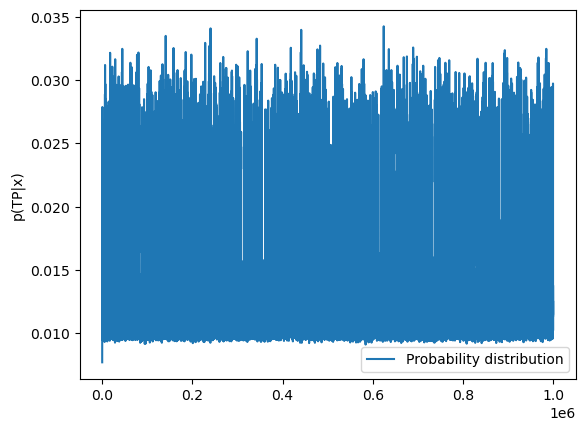

In [24]:
fig, ax = plt.subplots()
ax.plot(p_TP_x, label = 'Probability distribution') 
plt.ylabel('p(TP|x)')
plt.legend()
plt.show()

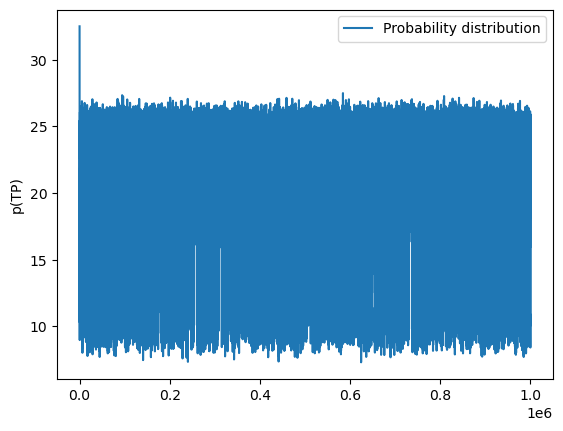

In [30]:
fig, ax = plt.subplots()
ax.plot(p_TP, label = 'Probability distribution') 
plt.ylabel('p(TP)')
plt.legend()
plt.show()